In [1]:
import numpy as np
from scipy.special import binom

In [8]:
1 / binom(36, 18)

1.1019119461502684e-10

In [9]:
(np.math.factorial(18)) ** 2 / np.math.factorial(36)

C:\Users\mrasp\AppData\Local\Temp\ipykernel_4144\1824305982.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  (np.math.factorial(18))**2/np.math.factorial(36)


1.1019119461502684e-10

In [2]:
n = 50
M = 365
1 - np.exp(-(n * (n - 1) / (2 * M)))

0.9651312540863107

## Визуализация задач

### Семинар 1. Задача 5

Казалось бы, при бросании двух игральных костей как $9$, так и
$10$ можно получить двумя разными способами: $9 = 3 + 6 = 4 + 5$,
$10 = 4 + 6 = 5 + 5$. 
В случае бросания трех костей $9$ и $10$ получаются
$6$ различными способами. 
Почему тогда при бросании двух костей $9$ появляется чаще $10$, а при бросании трех костей – $10$ чаще $9$?

In [19]:
n_throws = 5000
sums = []
for _ in range(n_throws):
    a = np.random.multinomial(1, [1 / 6] * 6, size=2)
    b = np.arange(1, 7)[np.argmax(a, axis=1)]
    sum = np.sum(b)
    sums.append(sum)
sums = np.array(sums)

c:\home\probability_theory_seminars\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\home\probability_theory_seminars\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


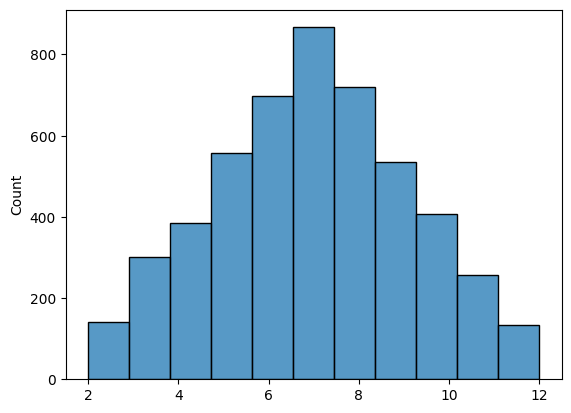

In [35]:
import seaborn as sns

sns.histplot(sums, bins=11);

In [34]:
values, count = np.unique(sums, return_counts=True)
count[np.where(values == 10)] / count[np.where(values == 9)], 3 / 4

(array([0.76074766]), 0.75)

### Семинар 2. Задача 3

Известно, что в результате бросания десяти игральных костей
выпала по крайней мере одна «шестерка». Какова вероятность того,
что число выпавших «шестерок» больше единицы?

Мы хотим понять смысл определения условной вероятности.  
Пусть $(\Omega, \mathcal{F}, \mathrm{P})$ - вероятностное пространство, $A,B\in\mathcal{F},\,\mathrm{P}(B)\neq 0$.
Тогда **условной вероятностью события $A$ при условии события $B$** называется
\begin{equation*}
    \mathrm{P}(A|B)=\frac{\mathrm{P}(AB)}{\mathrm{P}(B)}
\end{equation*}

Можно показать, что $\mathcal{F}_B=\{AB,A\in \mathcal{F}\}$ является $\sigma$-алгеброй.
Кроме того, условная вероятность удовлетворяет всем условиям из аксиаматического определения вероятности (неотрицательность, нормировка на единицу и счётная аддитивность).
Это позволяет определить *условное вероятностное пространство*.  

**Условным вероятностным пространством** называется тройка $(B, \mathcal{F}_B, \mathcal{P}_B)$, где $\mathcal{F}_B=\{AB,A\in \mathcal{F}\}$, $\mathcal{P}_B(A) = \mathcal{P}(A|B)$


In [46]:
import numpy as np
from scipy.special import binom

n_throws = 10000
index_to_number = np.arange(1, 7)
A_events = []
for _ in range(n_throws):
    a = np.random.multinomial(1, [1 / 6] * 6, size=10)
    numbers = index_to_number[np.argmax(a, axis=1)]
    if 6 in numbers:
        A_events.append(numbers)
A_events = np.array(A_events)

### Доля исходов, когда A произошло стремится к вероятности A

In [47]:
A_events.shape[0] / n_throws

0.8403

### Доля исходов, когда B произошло стремится к вероятности B

In [48]:
np.sum(np.sum(A_events == 6, axis=1) > 1) / n_throws

0.5097

### Доля тех элементарных событий, принадлежащий A, для которых B верно, стремится к условной вероятности $\mathrm{P}(B|A)$

In [50]:
np.sum(np.sum(A_events == 6, axis=1) > 1) / A_events.shape[0]

0.6065690824705462

### 1. Оценка матожидания в схеме Бернулли

В коде ниже произведём N раз n кратное подбрасывание монеты и проверим справедливость фомулы для закона больших чисел:

$$
\mathrm{P}\left(\left|\frac{S_n}{n}-p\right|\geq\varepsilon\right)=\sum_{\{k:\left|\frac{k}{n}-p\right|\geq\varepsilon\}}P_n(k) \leq \frac{1}{4n\varepsilon^2}
$$

Неравенство
$$
\mathrm{P}\left(\left|\frac{S_n}{n}-p\right|\leq\varepsilon\right)\geq 1-\alpha \tag{1}
$$
Будет выполнятся при 
$$
n\geq\frac{1}{4\varepsilon^2\alpha}
$$
Пусть $\alpha = 0.05$ и $\varepsilon=0.02$, тогда для $n=12500$ выполнения неравенства (2) будет гарантированно.

Проверим это


In [20]:
N = 5000
n = 12500
p = 0.5
alpha = 0.05
epsilon = 0.02
diffs = []
for _ in range(N):
    omega = np.random.binomial(1, p, n)
    S_n = np.sum(omega)
    diff = np.abs(S_n / n - p)
    diffs.append(diff)
diffs = np.array(diffs)
number_of_errors = np.sum(diffs > epsilon)
print(f"Estimate of success probability (1): {np.round(1-number_of_errors/N, 3)}")

Estimate of success probability (1): 1.0
